In [1]:
import pandas as pd
import numpy as np

In [2]:
driver = pd.read_csv("driver_ids.csv")
rider = pd.read_csv("ride_ids.csv")
timestamps = pd.read_csv("ride_timestamps.csv")

In [3]:
rider.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [408]:
# Convert the seconds into mintues 
rider['duration_min'] = rider['ride_duration'].apply(lambda x: x / 60)


In [409]:
# Convert meters into miles 
rider['distance_mi'] = rider['ride_distance'].apply(lambda x: x *  0.00062137)

#rider['time_money'] = rider['duration_min'].apply(lambda x: x * 0.22 + 2 + 1.75)

In [410]:
# Calculate the value of the fare 
#rider['time_money'] = rider['time_money'].apply(lambda x: x if x >= 5 else 5)

In [411]:
def calculate_fare(duration, distance):
    return 2 + (.22*duration) + (1.15*distance) + 1.75

In [412]:
rider['fare_duration'] = rider['duration_min'].apply(lambda x: x * .22)

In [413]:
rider['fare_distance'] = rider['distance_mi'].apply(lambda x: x * 1.15)

In [414]:
rider.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,duration_min,distance_mi,fare_duration,fare_distance
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125301,1.199000,1.294096
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089046,2.966333,2.402403
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039336,2.097333,2.345237
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564898,12.239333,46.649632
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556938,3.017667,2.940478


In [415]:
rider['total_fare'] = ((rider['fare_distance'] + rider['fare_duration']) * (1 + (0.01 * rider['ride_prime_time']))) + 2 + 1.75



In [417]:
rider['total_fare'] = rider['total_fare'].apply(lambda x: x if x >= 5 else 5)

In [419]:
rider['total_fare'] = rider['total_fare'].apply(lambda x: x if x <= 400 else 400)

In [420]:
# This to make sure there are no repeats in drivers 
#driver.groupby(['driver_id']).count()

In [421]:
# Number of rides per driver_id
#rider.groupby(['driver_id']).count()


# Find the distribution of ride time per driver
#rider.groupby(['driver_id']).mean()
rider.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,duration_min,distance_mi,fare_duration,fare_distance,total_fare
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125301,1.199000,1.294096,7.489644
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089046,2.966333,2.402403,9.118736
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039336,2.097333,2.345237,8.192570
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564898,12.239333,46.649632,77.361207
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556938,3.017667,2.940478,15.666290


In [422]:
# Drop unneccessary columns
drive_sum = rider.drop(['ride_id', 'ride_distance', 'ride_duration', 'fare_duration', 'fare_distance'], axis = 1)
# Group the riders by the sum 
drive_sum = drive_sum.groupby(['driver_id'],as_index=False).sum()

# Rename the columns to let people know that it's the sum of all rides 
drive_sum = drive_sum.rename(columns={"ride_prime_time": "ride_prime_time_sum", "duration_min": "duration_min_sum", "distance_mi":"distance_mi_sum", "fare":"fare_sum"})
drive_sum.head()

,driver_id,ride_prime_time_sum,duration_min_sum,distance_mi_sum,total_fare
0,002be0ffdc997bd5c50703158b7c2491,5375,3687.300000,1081.362133,3453.419687
1,007f0389f9c7b03ef97098422f902e62,625,341.616667,73.030237,308.994506
2,011e5c5dfc5c2c92501b8b24d47509bc,675,486.750000,167.554285,468.927442
3,0152a2f305e71d26cc964f8d4411add9,2050,2908.683333,914.183777,2569.866550
4,01674381af7edd264113d4e6ed55ecda,4700,5957.383333,1940.938672,5287.086873


In [423]:
# Drop unneccessary columns
drive_avg = rider.drop(['ride_id', 'ride_distance', 'ride_duration', 'fare_duration', 'fare_distance'], axis = 1)
# Group the riders by the sum 
drive_avg = drive_avg.groupby(['driver_id'],as_index=False).mean()

# Rename the columns to let people know that it's the sum of all rides 
drive_avg = drive_avg.rename(columns={"ride_prime_time": "ride_prime_time_avg", "duration_min": "duration_min_avg", "distance_mi":"distance_mi_avg", "fare":"fare_avg"})

drive_avg.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,total_fare
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,12.467219
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,9.967565
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,13.791984
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,13.454799
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,14.098898


In [424]:
# create a new data frame to contain frequency of riders 
df = pd.DataFrame()

df = rider.groupby(['driver_id'], as_index=False).size()

df = df.to_frame().reset_index()
df = df.rename(columns= {0: 'rides'})



In [425]:
# Combine sum with frequency of the rides
combined = pd.merge(drive_sum,df,on = 'driver_id', how = 'inner')
combined.head()

,driver_id,ride_prime_time_sum,duration_min_sum,distance_mi_sum,total_fare,rides
0,002be0ffdc997bd5c50703158b7c2491,5375,3687.300000,1081.362133,3453.419687,277
1,007f0389f9c7b03ef97098422f902e62,625,341.616667,73.030237,308.994506,31
2,011e5c5dfc5c2c92501b8b24d47509bc,675,486.750000,167.554285,468.927442,34
3,0152a2f305e71d26cc964f8d4411add9,2050,2908.683333,914.183777,2569.866550,191
4,01674381af7edd264113d4e6ed55ecda,4700,5957.383333,1940.938672,5287.086873,375


In [426]:
# Combine avg with frequency of the rides
combined = pd.merge(drive_avg,combined,on = 'driver_id', how = 'inner')
combined.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,total_fare_x,ride_prime_time_sum,duration_min_sum,distance_mi_sum,total_fare_y,rides
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,12.467219,5375,3687.300000,1081.362133,3453.419687,277
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,9.967565,625,341.616667,73.030237,308.994506,31
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,13.791984,675,486.750000,167.554285,468.927442,34
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,13.454799,2050,2908.683333,914.183777,2569.866550,191
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,14.098898,4700,5957.383333,1940.938672,5287.086873,375


In [427]:
# Combine sum dataframe with onboarding date
combined_date = pd.merge(combined,driver, on = 'driver_id', how = 'inner')
combined_date.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,total_fare_x,ride_prime_time_sum,duration_min_sum,distance_mi_sum,total_fare_y,rides,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,12.467219,5375,3687.300000,1081.362133,3453.419687,277,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,9.967565,625,341.616667,73.030237,308.994506,31,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,13.791984,675,486.750000,167.554285,468.927442,34,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,13.454799,2050,2908.683333,914.183777,2569.866550,191,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,14.098898,4700,5957.383333,1940.938672,5287.086873,375,2016-04-29 00:00:00


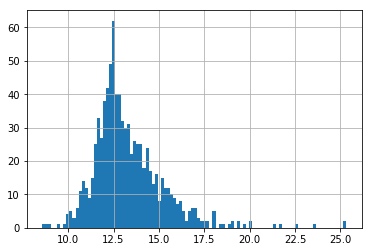

In [433]:
# Histogram of the average fare 
hist = combined_date['total_fare_x'].hist(bins=100)

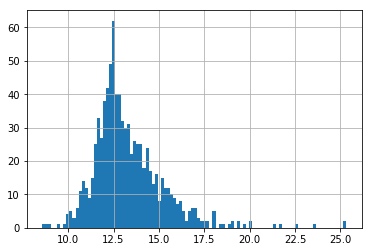

In [434]:
# Histogram of the sum of the fare
hist = combined_date['total_fare_x'].hist(bins=100)

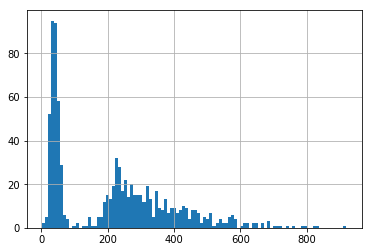

In [435]:
# Histogram of the number of rides 
hist = combined_date['rides'].hist(bins=100)

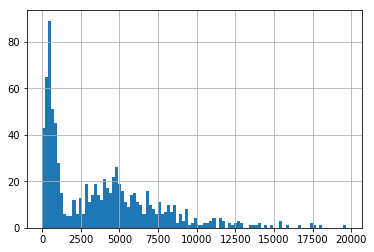

In [436]:
hist = combined_date['ride_prime_time_sum'].hist(bins=100)

In [438]:
# Add change the date string into a date object 
# combined_date['driver_onboard_date_object'] = combined_date['driver_onboard_date'].apply(lambda date: date[:10])
# combined_date['driver_onboard_date_object'] = combined_date['driver_onboard_date_object'].apply(pd.to_datetime)

combined_date['driver_onboard_datetime'] = pd.to_datetime(combined_date['driver_onboard_date'])

# Set index as the date
# combined_date = combined_date.set_index('driver_onboard_datetime')

# Drop the og column 
combined_date.drop(['driver_onboard_date'], axis=1, inplace=True)

# Preview the first couple of rows 


In [439]:
# Understand the type of data in the dataframe
# combined_date.info()

earliest_onboard = combined_date['driver_onboard_datetime'].sort_values(ascending= True)[0]
print(earliest_onboard)

latest_onboard = combined_date['driver_onboard_datetime'].sort_values(ascending= False)[752]
print(latest_onboard)

2016-03-29 00:00:00
2016-05-15 00:00:00


# Sally pay attention here lol

In [440]:
# Pivot based on ride id and event 
timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [441]:
# pivot the timestamps
pivot_timestamps = timestamps.pivot(index='ride_id', columns='event', values='timestamp')
pivot_timestamps.count()

event
accepted_at       194081
arrived_at        194080
dropped_off_at    194081
picked_up_at      194081
requested_at      194081
dtype: int64

In [442]:
# Preview the rides and the time stamp of each action 
pivot_timestamps.head()

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09
00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36
0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:24:14,2016-04-26 18:16:55,2016-04-26 18:11:38


In [443]:
ride_matches = rider[['driver_id','ride_id']]
ride_matches.head()

,driver_id,ride_id
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981


In [444]:
# merged the two data frames 
pivot_timestamps_driver = pd.merge(pivot_timestamps,ride_matches, on = 'ride_id', how = 'inner')
pivot_timestamps_driver.head()


,ride_id,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,driver_id
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b
1,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21,0656192a402808805282e60761bda088
2,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09,c468a648519cd42da75e6aa9dadf733e
3,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36,689bdf87fb2de49f98bf4946cfaa5068
4,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:45:05,2016-05-31 15:46:22,2016-05-31 15:59:26,2016-05-31 15:46:23,2016-05-31 15:44:56,eece82fe623b4bb335a9b9e20eb0ca54


In [445]:
# Reorder the columns
pivot_timestamps_driver = pivot_timestamps_driver[['driver_id', 'ride_id', 'requested_at', 'accepted_at', 'arrived_at', 'picked_up_at', 'dropped_off_at']]
pivot_timestamps_driver.sort_values(by=['driver_id']).head()





,driver_id,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at
3791,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,2016-05-25 16:26:32,2016-05-25 16:27:03,2016-05-25 16:38:20,2016-05-25 16:38:22,2016-05-25 16:57:25
156507,002be0ffdc997bd5c50703158b7c2491,d8edfed30bbc7230a02cf38b48f34e97,2016-06-22 19:53:37,2016-06-22 19:53:42,2016-06-22 19:54:33,2016-06-22 19:55:30,2016-06-22 20:06:00
10009,002be0ffdc997bd5c50703158b7c2491,0dfbe7e38482e24247f6ebd53d5f6c33,2016-06-16 14:17:56,2016-06-16 14:18:11,2016-06-16 14:19:26,2016-06-16 14:20:25,2016-06-16 14:39:52
134063,002be0ffdc997bd5c50703158b7c2491,b9f144fefe0dc1c00ffd79d8c0d912b0,2016-03-31 18:48:49,2016-03-31 18:48:53,2016-03-31 18:52:15,2016-03-31 18:52:20,2016-03-31 19:05:00
34716,002be0ffdc997bd5c50703158b7c2491,30463a7563244b8aa6122a74efc2275b,2016-04-01 22:15:19,2016-04-01 22:15:25,2016-04-01 22:21:16,2016-04-01 22:21:20,2016-04-01 22:35:25


In [446]:
pivot_timestamps_driver.head(5)

,driver_id,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at
0,d967f5296732fa55266b5f1314e7447b,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:19,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 09:44:33,2016-06-13 10:03:05
1,0656192a402808805282e60761bda088,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:21,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:26:18,2016-05-14 05:34:17
2,c468a648519cd42da75e6aa9dadf733e,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:09,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:47:32,2016-05-16 15:54:18
3,689bdf87fb2de49f98bf4946cfaa5068,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:36,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:35:15,2016-05-11 19:40:47
4,eece82fe623b4bb335a9b9e20eb0ca54,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:44:56,2016-05-31 15:45:05,2016-05-31 15:46:22,2016-05-31 15:46:23,2016-05-31 15:59:26


In [462]:
df.head()

,driver_id,rides
0,002be0ffdc997bd5c50703158b7c2491,277
1,007f0389f9c7b03ef97098422f902e62,31
2,011e5c5dfc5c2c92501b8b24d47509bc,34
3,0152a2f305e71d26cc964f8d4411add9,191
4,01674381af7edd264113d4e6ed55ecda,375


In [588]:
# Create a dictionary of all the drivers as the key and the list of dates as a value
driver_ridedates = {}
for driver_id in df['driver_id']:
    #print(driver_id)
    #print(driver_ridedates)
    picked_up_at = pivot_timestamps_driver[pivot_timestamps_driver['driver_id'] == driver_id]['picked_up_at']
    driver_ridedates[driver_id] = picked_up_at.tolist()


In [473]:

pivot_timestamps_driver[pivot_timestamps_driver['driver_id'] == 'd967f5296732fa55266b5f1314e7447b']

,driver_id,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at
0,d967f5296732fa55266b5f1314e7447b,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:19,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 09:44:33,2016-06-13 10:03:05
201,d967f5296732fa55266b5f1314e7447b,0048faa2dd6cbca86a64b084e2f99ce7,2016-06-15 13:14:48,2016-06-15 13:14:56,2016-06-15 13:18:35,2016-06-15 13:19:34,2016-06-15 13:26:17
482,d967f5296732fa55266b5f1314e7447b,00ab2245c0cbc18b472c3e8246a5c3d6,2016-05-16 14:08:02,2016-05-16 14:08:09,2016-05-16 14:08:41,2016-05-16 14:08:44,2016-05-16 14:31:25
949,d967f5296732fa55266b5f1314e7447b,014d54c00e2d37765110098c82cad83e,2016-05-15 14:09:10,2016-05-15 14:09:18,2016-05-15 14:11:57,2016-05-15 14:12:01,2016-05-15 14:34:31
980,d967f5296732fa55266b5f1314e7447b,015a5a42be7f592c212041ea7251a7ba,2016-06-19 00:04:55,2016-06-19 00:05:01,2016-06-19 00:05:59,2016-06-19 00:06:39,2016-06-19 00:12:42
1481,d967f5296732fa55266b5f1314e7447b,01fbafab04b41fc9b6291542af212ed1,2016-05-25 08:08:45,2016-05-25 08:08:49,2016-05-25 08:12:29,2016-05-25 08:12:30,2016-05-25 08:36:51
1638,d967f5296732fa55266b5f1314e7447b,023553a5e8d7b9bd73102e280c841473,2016-05-28 21:34:28,2016-05-28 21:34:36,2016-05-28 21:45:08,2016-05-28 21:45:11,2016-05-28 21:51:46
1828,d967f5296732fa55266b5f1314e7447b,02738304c0cfe665f675930dccbfab41,2016-06-11 20:20:05,2016-06-11 20:20:11,2016-06-11 20:20:56,2016-06-11 20:21:23,2016-06-11 20:31:50
2310,d967f5296732fa55266b5f1314e7447b,032680e8c1d8ef615e4c747968cd7d78,2016-06-01 06:55:02,2016-06-01 06:55:10,2016-06-01 06:57:37,2016-06-01 06:57:39,2016-06-01 07:02:52
2414,d967f5296732fa55266b5f1314e7447b,0349b3fb11edd41507f28dd7c7366582,2016-05-28 02:18:31,2016-05-28 02:18:41,2016-05-28 02:19:30,2016-05-28 02:19:31,2016-05-28 02:31:08


In [472]:
pivot_timestamps_driver.head()

,driver_id,ride_id,requested_at,accepted_at,arrived_at,picked_up_at,dropped_off_at
0,d967f5296732fa55266b5f1314e7447b,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:19,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 09:44:33,2016-06-13 10:03:05
1,0656192a402808805282e60761bda088,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:21,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:26:18,2016-05-14 05:34:17
2,c468a648519cd42da75e6aa9dadf733e,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:09,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:47:32,2016-05-16 15:54:18
3,689bdf87fb2de49f98bf4946cfaa5068,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:36,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:35:15,2016-05-11 19:40:47
4,eece82fe623b4bb335a9b9e20eb0ca54,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:44:56,2016-05-31 15:45:05,2016-05-31 15:46:22,2016-05-31 15:46:23,2016-05-31 15:59:26
